XYZ — частная фирма в США. В связи с заметным ростом в индустрии такси за последние несколько лет и несколькими ключевыми игроками на рынке, компания планирует инвестировать в индустрии такси и в соответствии со своей стратегией выхода на рынок (G2M) они хотят понять рынок, прежде чем принимать окончательное решение.

ЦЕЛЬ
Предоставьте практическую информацию, которая поможет фирме XYZ определить правильную компанию для инвестиций.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from datetime import datetime


## Описание данных

In [2]:
df_cab = pd.read_csv('https://raw.githubusercontent.com/memudualimatou/CAB-INVESTMENT-EDA/main/Cab_Data.csv')
df_city = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
df_cus = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
df_tran = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

In [3]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [5]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [7]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
df_cus.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
df_tran.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
df_cab['Transaction ID'].nunique()

359392

## Преобразование данных


In [12]:
# transform population and user number into int
df_city['Population'] = [x.replace(',','') for x in df_city['Population']]
df_city['Population'] = df_city['Population'].astype(np.int64)

# Attribute 'Users' should be an integer
df_city['Users'] = [x.replace(',','') for x in df_city['Users']]
df_city['Users'] = df_city['Users'].astype(np.int64)

In [13]:
df_city.dtypes

,0
City,object
Population,int64
Users,int64


In [14]:
df = df_cab.merge(df_tran, how= 'left', on= 'Transaction ID')
df = df.merge(df_cus, how= 'left', on ='Customer ID')
df = df.merge(df_city, how= 'left', on = 'City')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 38.4+ MB


In [15]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


In [16]:
df.isna().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0
Customer ID,0
Payment_Mode,0
Gender,0


In [17]:
import xlrd

In [18]:
df['Date of Travel'] = df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))

In [19]:
# Create Year and Season columns in the data
df['year'] = df['Date of Travel'].dt.year
df['month'] = df['Date of Travel'].dt.month

In [20]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,2016,1
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701,2016,1
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001,2018,1
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001,2018,1
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001,2018,1
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001,2018,1


In [21]:
# Create Profit Column
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

In [22]:
#df['Travel_year_Month'] = pd.to_datetime(df['Date of Travel']).dt.to_period('M')
#df['Travel_year']=pd.DatetimeIndex(df['Date of Travel']).year
#df['Travel_month']=pd.DatetimeIndex(df['Date of Travel']).month
#df

## Исследование данных

[Text(0.5, 0, 'Transaction ID'),
 Text(1.5, 0, 'KM Travelled'),
 Text(2.5, 0, 'Price Charged'),
 Text(3.5, 0, 'Cost of Trip'),
 Text(4.5, 0, 'Customer ID'),
 Text(5.5, 0, 'Age'),
 Text(6.5, 0, 'Income (USD/Month)'),
 Text(7.5, 0, 'Population'),
 Text(8.5, 0, 'Users'),
 Text(9.5, 0, 'year'),
 Text(10.5, 0, 'month'),
 Text(11.5, 0, 'Profit')]

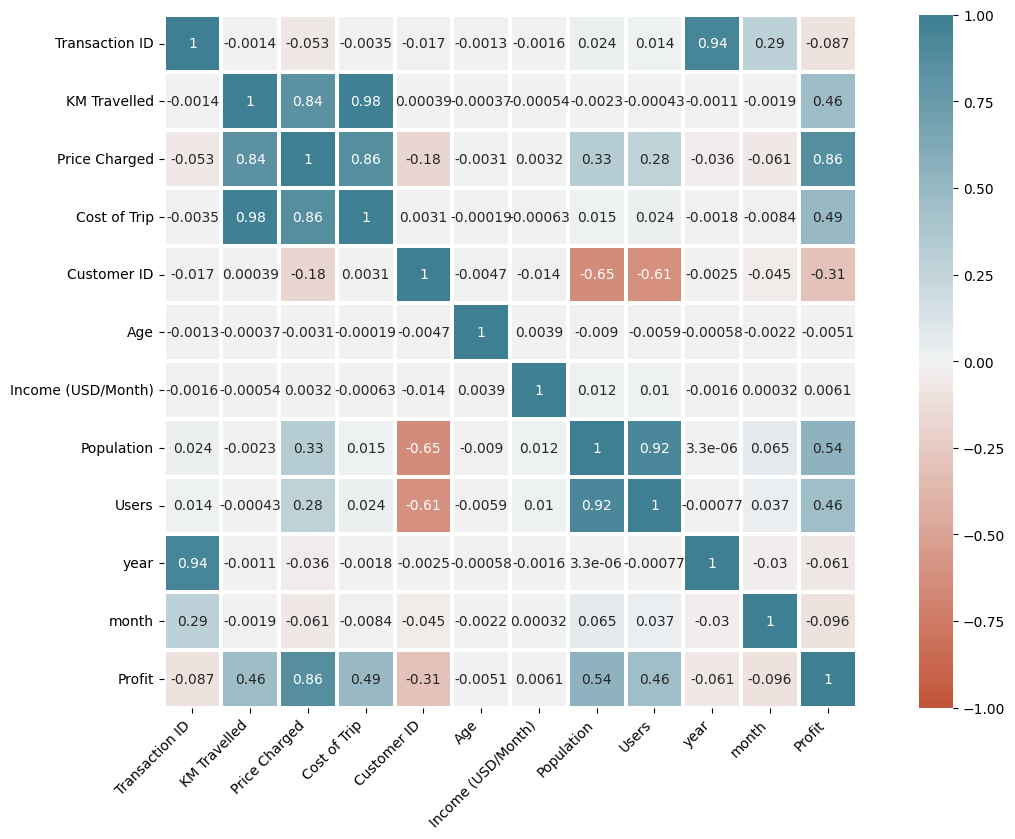

In [23]:
corr =df.corr(numeric_only=True)

plt.figure(figsize = (16, 9))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    annot = True,
    annot_kws={'fontsize' : 10},
    linewidths = 1.5,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

 **Как и ожидалось, мы видим сильную положительную корреляцию между пройденным км и взимаемой ценой и стоимостью поездки, а также положительную корреляцию между населением и пользователями**



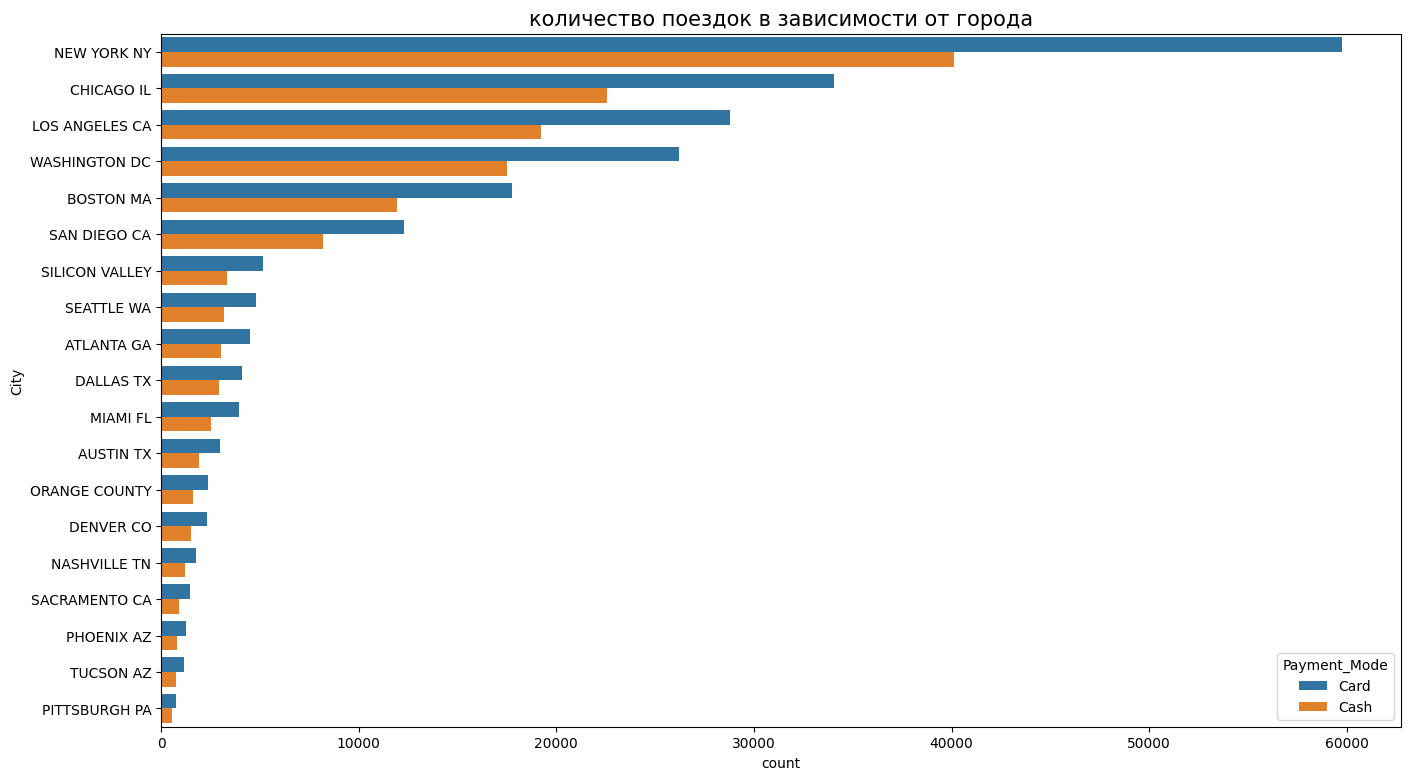

In [24]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(y='City', data=df, hue='Payment_Mode', order=df['City'].value_counts(ascending = False).index)
plt.title('количество поездок в зависимости от города', fontsize=15);

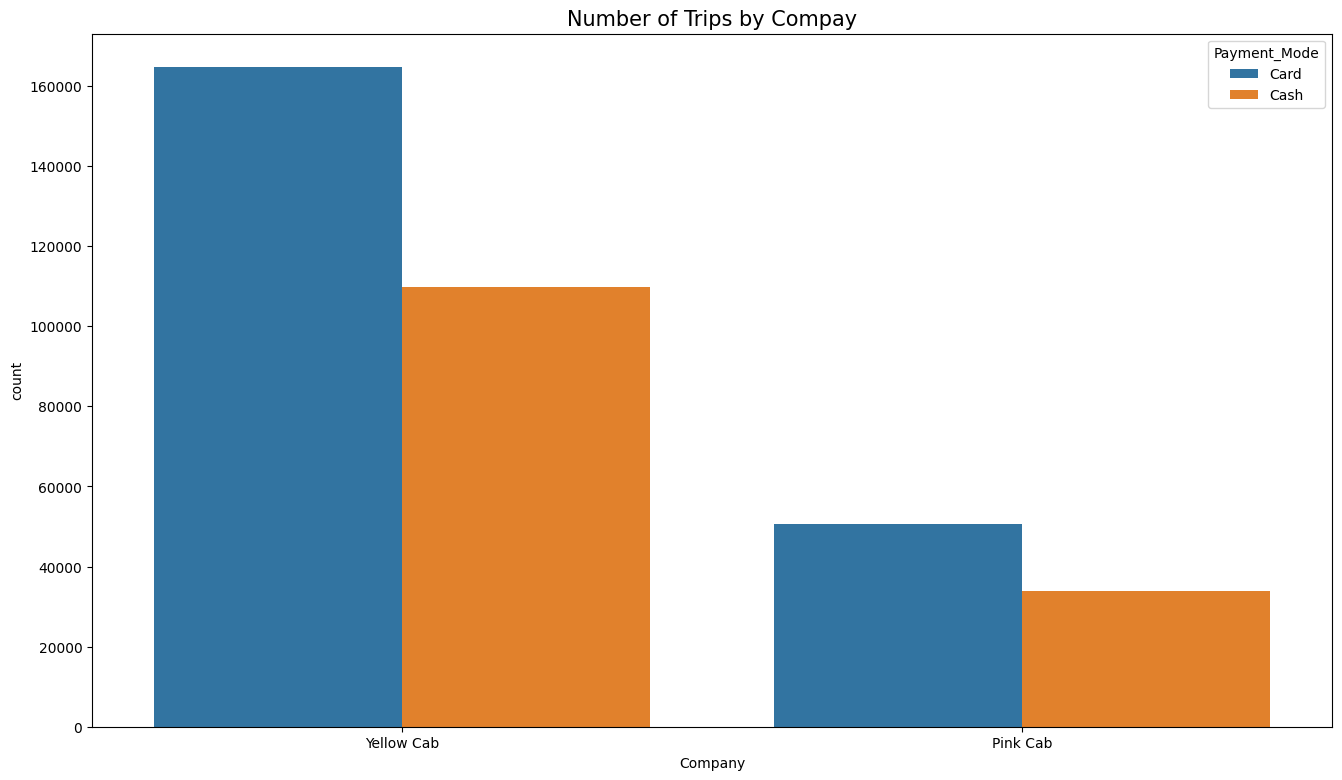

In [25]:
plt.figure(figsize = (16, 9))

ax = sns.countplot(x='Company', data=df, hue='Payment_Mode', order=df['Company'].value_counts(ascending = False).index)
plt.title('Number of Trips by Compay', fontsize=15);

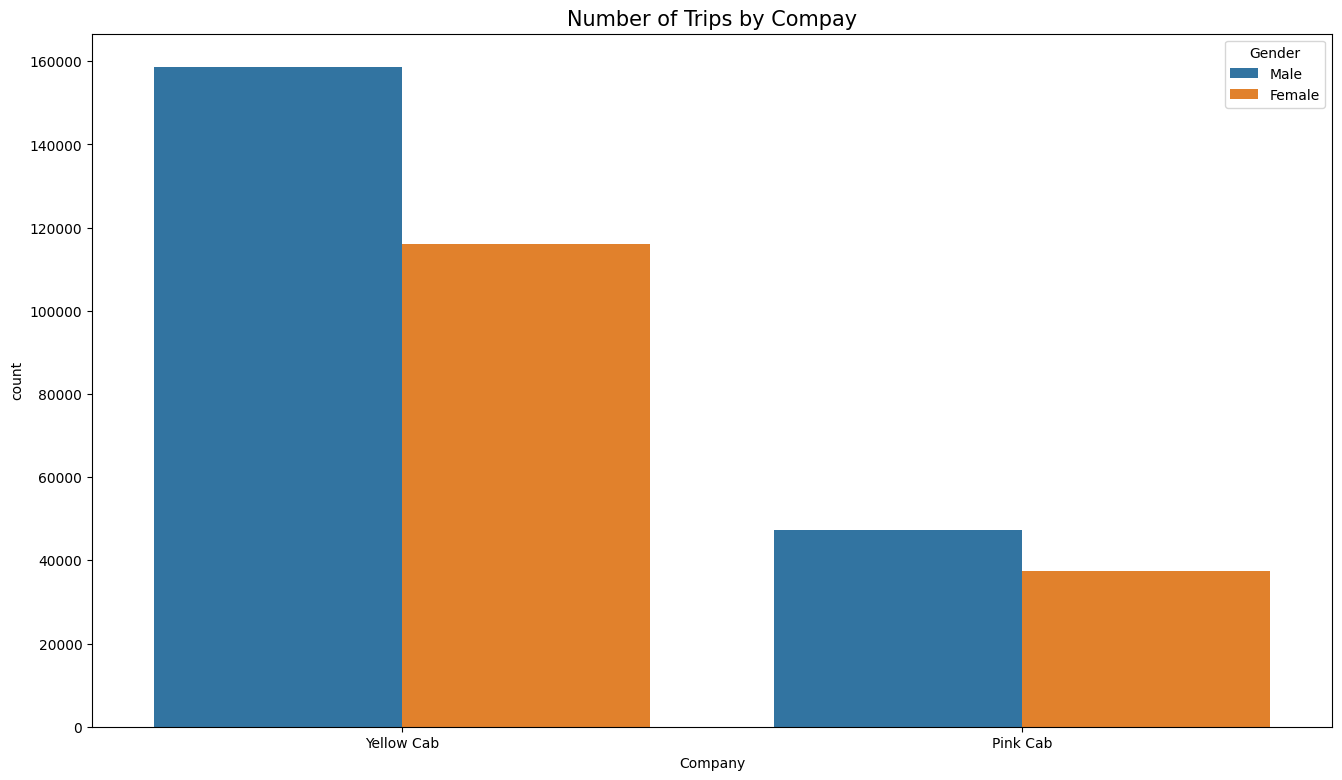

In [26]:
plt.figure(figsize = (16, 9))

ax = sns.countplot(x='Company', data=df, hue='Gender', order=df['Company'].value_counts(ascending = False).index)
plt.title('Number of Trips by Compay', fontsize=15);

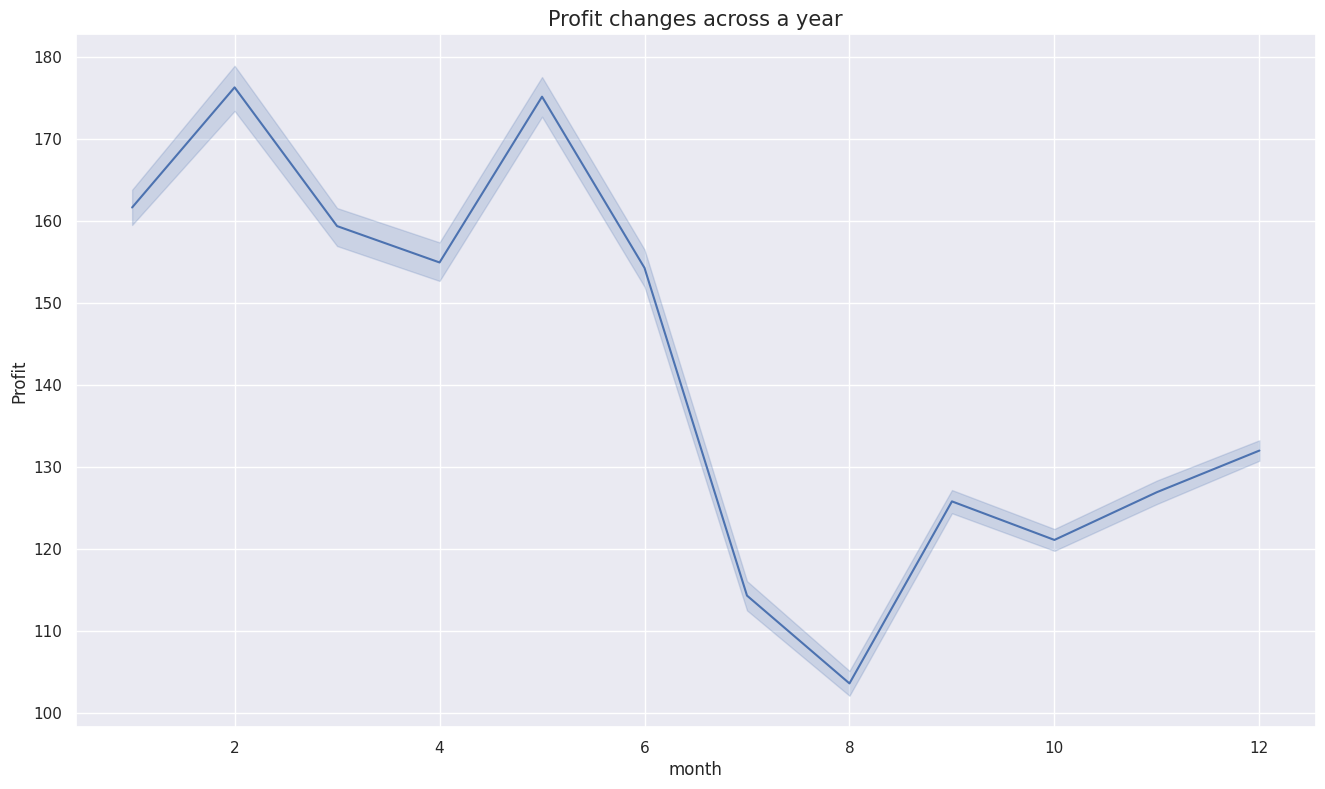

In [27]:
plt.figure(figsize = (16, 9))
sns.set(style = 'darkgrid')

sns.lineplot(x='month', y='Profit', data=df)
plt.title('Profit changes across a year', fontsize=15);

Мы видим, что в середине года, особенно в 6-8 месяце, наблюдается падение прибыли, летом это может быть связано с некоторой сезонностью.

In [28]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,1,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,1,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,1,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,1,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,2016,1,16.844


In [ ]:
print(df.isnull().sum())

Transaction ID             0
Date of Travel        359392
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
Population                 0
Users                      0
year                  359392
month                 359392
Profit                     0
dtype: int64


## Проверка гипотез

### Гипотеза 1: Yellow Cab Company получает более  маржинальную прибыль, чем Pink Cab Company
H0: Yellow Cab Company не имеет разницы в  прибыли, чем Pink Cab Company. <br>
H1: Yellow Cab Company имеет более высокую  прибыль, чем Pink Cab Company

In [29]:
company = df.groupby('Company')
profits = company['Profit'].sum()
revenue = company['Price Charged'].sum()

In [30]:
profits

,Profit
Company,
Pink Cab,5.307328e+06
Yellow Cab,4.402037e+07


In [31]:
revenue

,Price Charged
Company,
Pink Cab,2.632825e+07
Yellow Cab,1.258539e+08


In [32]:
yellow_margin = df.loc[(df.Company == 'Yellow Cab'),'Profit']/df.loc[(df.Company == 'Yellow Cab'),'Price Charged']
pink_margin = df.loc[(df.Company == 'Pink Cab'),'Profit']/df.loc[(df.Company == 'Pink Cab'),'Price Charged']

In [33]:
yellow_margin

,0
233,0.653912
234,0.634376
235,0.637189
236,0.601623
237,0.612868
...,...
359387,0.084922
359388,0.060677
359389,0.200014
359390,0.219865


In [34]:
results = stats.levene(yellow_margin , pink_margin)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.0
Отклонить гипотезу о равенстве дисперсий


In [35]:
t_stat, p_value = stats.ttest_ind(yellow_margin, pink_margin, equal_var= False, alternative = 'greater')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  199.14466870385888
P-Value:  0.0


> Поскольку у нас очень значимое значение p (p < 0,<>), мы можем отвергнуть нулевую гипотезу и заключить, что компания yellow cab имеет значительно более высокую маржу, чем компания pink cab.

### Гипотеза 2: Существует значительная разница в прибыли между клиентами мужского и женского пола¶
H0: Нет никакой разницы в прибыли между пользователями мужского и женского пола. <br>
H1: Существует значительная разница в прибыли между пользователями мужского и женского полаe users

In [36]:
male_profit = df.loc[(df.Gender=='Male'), 'Profit']
female_profit = df.loc[(df.Gender=='Female'), 'Profit']

In [37]:
results = stats.levene(male_profit, female_profit,)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

1.4760993455551315e-33
Отклонить гипотезу о равенстве дисперсий


In [38]:
t_stat, p_value = stats.ttest_ind(male_profit, female_profit, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)


if (p_value < 0.05):
    print('Существует значительная разница в прибыли между пользователями мужского и женского полаe users')
else:
    print(' Нет никакой разницы в прибыли между пользователями мужского и женского пола.')

T-statistic value:  12.779628685726511
P-Value:  2.173838984882979e-37
Существует значительная разница в прибыли между пользователями мужского и женского полаe users


> Значение p меньше 0,05, поэтому мы отвергаем нулевую гипотезу и делаем вывод о существенной разнице в прибыли между пользователями мужского и женского пола

### Гипотеза 3: Существует существенная разница в прибыли между карточными и наличными платежами
H0: Нет никакой разницы в прибыли между оплатой картой и наличными.<br>
H1: Существует значительная разница в прибыли между картой и наличными

In [39]:
card_profit = df.loc[(df.Payment_Mode=='Card'), 'Profit']
cash_profit = df.loc[(df.Payment_Mode=='Cash'), 'Profit']

In [40]:
results = stats.levene(card_profit, cash_profit)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.21567670576181658
Принять гипотезу о равенстве дисперсий


In [41]:
t_stat, p_value = stats.ttest_ind(card_profit, cash_profit, equal_var=True, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -0.7630743349932244
P-Value:  0.4454195660215633


 > Наше значение p больше 0,05, поэтому мы не можем отвергнуть нулевую гипотезу о том, что нет разницы в прибыли между картой и наличными.

### Гипотеза 4: Существует некоторая разница в прибыли между сезонами¶
H0: вся прибыль за четыре сезона одинакова. <br>
H1: по крайней мере, в одном сезоне протфиты отличаются от других сезонов

In [42]:
spring_profit = df.loc[(df.month>=3)&(df.month<=5), 'Profit']
summer_profit = df.loc[(df.month>=6)&(df.month<=8), 'Profit']
fall_profit = df.loc[(df.month>=9)&(df.month<=11), 'Profit']
winter_profit = df.loc[(df.month==12)|(df.month<=2), 'Profit']

In [43]:
spring_profit.values

array([105.585 ,  32.65  , 132.68  , ...,  49.3068, 131.76  ,  15.08  ])

In [44]:
print('Variance test:', stats.levene(spring_profit, summer_profit, fall_profit, winter_profit))

Variance test: LeveneResult(statistic=np.float64(786.9524556684952), pvalue=np.float64(0.0))


In [45]:
fvalue, pvalue = stats.f_oneway(spring_profit, summer_profit, fall_profit, winter_profit)
print("F-statistic value: ", fvalue)
print("P-Value: ", pvalue)

F-statistic value:  1269.6403268417762
P-Value:  0.0


Мы видим, что есть существенная разница между запуском f-теста, и тем, что мы отдельно проверяем, имеет ли лето значительно меньшую прибыль по сравнению с другими сезонами

In [46]:
t_stat, p_value = stats.ttest_ind(summer_profit, spring_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -46.820245657612034
P-Value:  0.0


In [47]:
t_stat, p_value = stats.ttest_ind(summer_profit, winter_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -34.91309834956815
P-Value:  2.0203546837999336e-266


In [48]:
t_stat, p_value = stats.ttest_ind(summer_profit, fall_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -3.7490754352857634
P-Value:  8.876831073342808e-05


> В результате мы находим только существенную разницу между прибылью летнего и весеннего сезонов (p < 0,01), поэтому мы можем заключить, что летний сезон имеет меньшую прибыль по сравнению с весенним сезоном, но не имеет существенной разницы по сравнению с осенним и зимним сезоном

### Гипотеза 5: Существует значительная корреляция между количеством клиентов и прибылью
H0: Нет существенной корреляции между количеством клиентов и прибылью.<br>
H1: Существует значительная корреляция между количеством клиентов и прибылью.

df.head()

In [49]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,1,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,1,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,1,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,1,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,2016,1,16.844


In [50]:
pearson_r, p_value = stats.pearsonr(df['Users'], df['Profit'])
print("Correlation Coeffcient: ", pearson_r)
print("P-Value: ", p_value)

Correlation Coeffcient:  0.4577576722574396
P-Value:  0.0


> Мы обнаружили, что существует значимая (p < 0,01) средняя положительная корреляция между размером пользователя и прибылью со значением Пирсона r 0,46

## Рекомендация:
1. Yellow Cab более выгоден, чем Pink Cab, поэтому можно порекомендовать больше инвестировать в Yello Cab.
2. Клиенты-мужчины приносят более высокую прибыль, чем клиенты-женщины, что может быть реализовано при рассмотрении целевых клиентов в рекламе.
3. Летний сезон показывает меньшую прибыль, чем другие сезоны, поэтому следует вкладывать больше инвестиций в другие сезоны, чтобы получить большую прибыль.
4. Города с большим количеством пользователей с большей вероятностью будут иметь более высокую прибыль, поэтому будет важно увеличить общий размер пользователей или инвестировать больше в более крупные города, ориентированные на пользователей.